In [110]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [79]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=20

In [50]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [51]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [52]:
len(dataset)

68

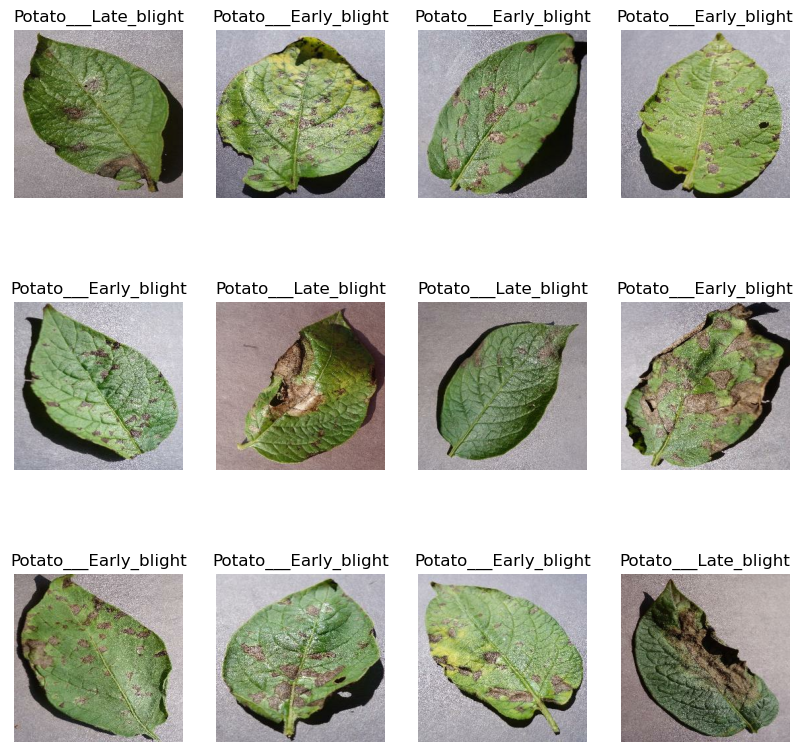

In [53]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [54]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [55]:
train_ds=dataset.take(54)
len(train_ds)

54

In [56]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [57]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [58]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [59]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [60]:
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):

    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [61]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [62]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [63]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [64]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [69]:
from tensorflow.keras import models, layers

input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)  # Update this line
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)


In [ ]:
model.summary()

In [72]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [80]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20


54/54 [==============================] - 52s 966ms/step - loss: 0.1783 - accuracy: 0.9271 - val_loss: 0.4439 - val_accuracy: 0.8594
Epoch 2/20
54/54 [==============================] - 50s 931ms/step - loss: 0.1863 - accuracy: 0.9317 - val_loss: 0.2138 - val_accuracy: 0.8958
Epoch 3/20
54/54 [==============================] - 50s 926ms/step - loss: 0.1299 - accuracy: 0.9462 - val_loss: 0.1943 - val_accuracy: 0.9167
Epoch 4/20
54/54 [==============================] - 50s 924ms/step - loss: 0.1098 - accuracy: 0.9531 - val_loss: 0.3542 - val_accuracy: 0.8802
Epoch 5/20
54/54 [==============================] - 50s 935ms/step - loss: 0.0887 - accuracy: 0.9705 - val_loss: 0.4090 - val_accuracy: 0.8750
Epoch 6/20
54/54 [==============================] - 50s 933ms/step - loss: 0.0877 - accuracy: 0.9682 - val_loss: 0.3397 - val_accuracy: 0.9010
Epoch 7/20
54/54 [==============================] - 117s 2s/step - loss: 0.0732 - accuracy: 0.9716 - val_loss: 0.2455 - val_accuracy: 0.9167
Epoch 8/20
5

In [81]:
scores=model.evaluate(test_ds)
print(scores)

8/8 [==============================] - 1s 173ms/step - loss: 0.0570 - accuracy: 0.9727
[0.05697191506624222, 0.97265625]


In [82]:
history

In [84]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [85]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [86]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']


In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Acuuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Acuuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

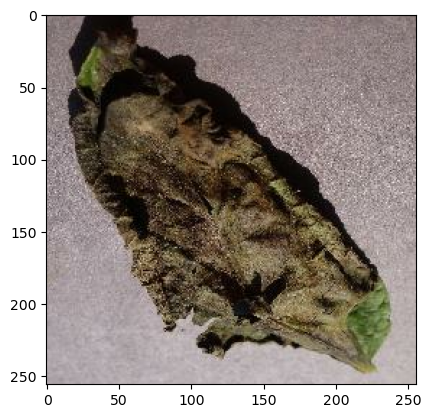

In [94]:
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')

In [117]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #create a batch

    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

# def predict(model, img):
#     img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
#     img_array = tf.expand_dims(img_array, 0)

#     predictions = model.predict(img_array)

#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(100 * (np.max(predictions[0])), 2)
#     return predicted_class, confidence

In [1]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class =class_names[labels[i]]

        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class}.\n confidence:{confidence}")
        plt.axis("off")

NameError: name 'plt' is not defined

In [128]:
import os
model_version=max([int(i) for i in  os.listdir("model")+[0]])+1
model.save(f"model/{model_version}")

INFO:tensorflow:Assets written to: model/2\assets


INFO:tensorflow:Assets written to: model/2\assets
